In [26]:
import numpy as np
import math
import os
import time as t

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec

from PIL import Image

from utils import read_tiff, scan_directory_tree, make_dir, save_np_sequence_as_multitiff_stack

In [8]:
path_input = u'e:\\Data\\spray\\comp_18_1_vs_7_3\\'

In [17]:
max_read_images = 1600

print ('Reading data...')
start = t.time()
images = read_tiff(path_input + 'seq_compare_zoomed_v2.tif', max_read_images)
end = t.time()
print ('Time elapsed: ', (end-start))

Reading data...
Time elapsed:  1.198000192642212


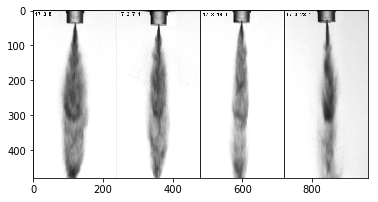

In [18]:
plt.imshow(images[23], cmap='gray')
plt.show()

## Keep fixed time frame for all spraying events 

In [24]:
s = 1
start = 23
gap = 70


keep_indexes = np.arange(s+start, len(images), gap)

print(keep_indexes)

frames = []

for i in keep_indexes:
    frames.append(images[i -1])
    
save_np_sequence_as_multitiff_stack(frames, path_input + 'seq_start_events_{}.tif'.format(str(s).zfill(3)))


[  24   94  164  234  304  374  444  514  584  654  724  794  864  934
 1004]


## Avarage corresponding time frames for all spraying events

In [30]:

duration = 47

for i in range(duration):
    
    keep_indexes = np.arange(i+start, len(images), gap)
    
    frames = []

    for k in keep_indexes:
        frames.append(images[k -1])
        
    avg = np.mean(frames, axis=0)
    
    im_res = Image.fromarray(avg)
    im_res.save(path_input + 'averaged\\avg_time_frame_{}.tif'.format(str(i).zfill(3)))

    
